<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C7/C7.html"><img src="../data/C7_nav.png" width="100"  style="float:right;" alt="C7"></a>
<h1>Audio Matching</h1> 
</div>

<br/>

<p>
Following Section 7.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook the task of audio matching, which was originally considered in the following article.
    
<ul>
<li><span style="color:black">
Meinard Müller, Frank Kurth, and Michael Clausen: <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2005_MuellerKurthClausen_AudioMatching_ISMIR.pdf"><strong>Audio Matching via Chroma-Based Statistical Features</strong></a> Proceedings of the International Conference on Music Information Retrieval (ISMIR), London, UK, pp. 288–295, 2005.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerKC05_ChromaFeatures_ISMIR.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 

## Task Specification and General Requirements


In the [FMP notebook on content-based audio retrieval](../C7/C7_ContentBasedAudioRetrieval.html), we  gave an introduction to various retrieval tasks based on the query-by-example paradigm. While significant progress has been made for highly specific retrieval scenarios such as [audio identification](../C7/C7S1_AudioIdentification.html), retrieval scenarios of lower [specificity](../C7/C7_ContentBasedAudioRetrieval.html) still pose many challenges. We now address a retrieval task referred to as **audio matching**: given a short query audio clip, the goal is to automatically retrieve all excerpts from all recordings within a given audio database that **musically** correspond to the query. In this matching scenario, as opposed to classic audio identification, one allows semantically motivated variations as they typically appear in different performances and arrangements of a piece of music. For example, two different performances of the same piece may exhibit significant nonlinear global and local differences in tempo, articulation, and phrasing, which are due to the freedom an artist has in executing performance directives such as ritardandi, accelerandi, fermata signs, or ornamentations. Furthermore, one has to deal with considerable spectral variations, which are due to differences in instrumentation, dynamics, accentuation, and so on. 

To further illustrate the audio matching scenario, let us consider the [Symphony No. 5 by Ludwig van Beethoven](../C1/C1S1_SheetMusic.html). Being one of the most popular pieces in the Western classical music literature, there exist a large number of different performances and arrangements of Beethoven's Fifth Symphony. More than $100$ recordings are commercially available, not to mention numerous nonprofessional live performances as may be found on video-sharing websites such as YouTube. Here are some examples for the first 21 measures (also shown as [sheet music representation](../C1/C1S1_SheetMusic.html) in a piano-reduced form).

<img src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Sibelius-Piano.png" width="700px" align="left" alt="C7">

<br clear="all" />

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Performer</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>
    
  <tr>
    <td style="border:none;text-align:left;">Bernstein</td>
    <td style="border:none;text-align:left;"><audio src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio></td>
  </tr>

  <tr>
    <td style="border:none;text-align:left;">Karajan</td>
    <td style="border:none;text-align:left;"><audio src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Karajan.mp3" type="audio/mpeg" controls="controls"></audio></td>
  </tr>

  <tr>
    <td style="border:none;text-align:left;">Sawallisch</td>
    <td style="border:none;text-align:left;"><audio src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Sawallisch.mp3" type="audio/mpeg" controls="controls"></audio></td>
  </tr>

  <tr>
    <td style="border:none;text-align:left;">Gould (piano version)</td>
    <td style="border:none;text-align:left;"><audio src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Gould.mp3" type="audio/mpeg" controls="controls"></audio></td>
  </tr>

  <tr>
    <td style="border:none;text-align:left;">Scherbakov (piano verison)</td>
    <td style="border:none;text-align:left;"><audio src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01-001-021_Scherbakov.mp3" type="audio/mpeg" controls="controls"></audio></td>
  </tr>
</table>

PDQ Bach - Beethoven Symphony No. 5


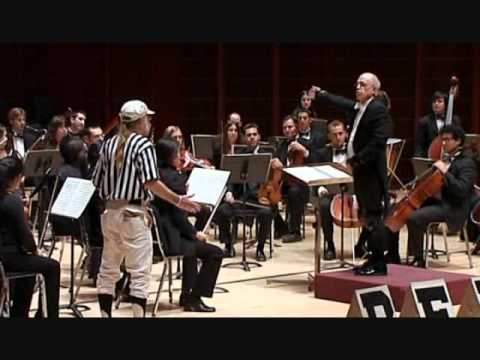

In [1]:
import IPython.display as ipd
import numpy as np
print('PDQ Bach - Beethoven Symphony No. 5')
ipd.display(ipd.YouTubeVideo('MzXoVo16pTg', start=1, width=480, height=360))

Now imagine you are sitting in a student orchestra concert at your university and listen to a performance of Beethoven's Fifth. You take your smartphone, record a few seconds, and send the audio fragment to an identification service. Since the live performance of the query is not part of the system's fingerprint database, the service will not be able to identify the recording when using traditional [fingerprinting techniques](../C7/C7S1_AudioIdentification.html). This is exactly the scenario where audio matching techniques should step in. 

For example, let us assume that the query consists of a recording of the first theme of Beethoven's Fifth. Then the goal of audio matching is to find all audio fragments that musically correspond to the query in a given database. The retrieved matches should include the repetitions of the main theme in the exposition and recapitulation within the same performance as well as the corresponding excerpts in other recordings, arrangements, and synthesized versions (e.g., obtained from MIDI files). All the retrieved matches can then be presented and made accessible to a user by means of suitable interfaces. Extending the functionality of the [Interpretation Switcher](../C3/C3S3_MusicAppNav.html) (see Section 3.3.1.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>), all the matching sections within the retrieved recordings can be highlighted, as indicated by the next figure. Based on this interface, the user can easily browse through and listen to the retrieved audio fragments, possibly starting a new retrieval process with a refined query or a retrieved item.

<img src="../data/C7/FMP_C7_F08.png" width="400px" align="middle" alt="FMP_C67_F08.png">


<br clear="all" />

<table style="border:none;text-align:left;">
   <tr>
      <th style="width:16%; border:none;text-align:left;">Performer</th>
      <th style="width:28%; border:none;text-align:left;">Theme (Exposition)</th>
      <th style="width:28%; border:none;text-align:left;">Theme (Repetition of Exposition)</th>        
      <th style="width:28%; border:none;text-align:left;">Theme (Recapitulation)</th>      
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Bernstein</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Bernstein_Theme_1.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Bernstein_Theme_2.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Bernstein_Theme_3.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>       
   </tr>
   

   <tr>
      <td style="border:none;text-align:left;">Karajan</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Karajan_Theme_1.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Karajan_Theme_2.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Karajan_Theme_3.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>       
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Scherbakov <br>(piano verison)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Scherbakov_Theme_1.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Scherbakov_Theme_2.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 180px;" src="../data/C7/FMP_C7_Audio_Beethoven_Op067-01_Scherbakov_Theme_3.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>       
   </tr>    
</table>

## Overall Matching Approach

In the audio matching scenario, we are given a query audio fragment $\mathcal{Q}$ and a collection of database recordings. Without loss of generality (e.g., by concatenating all recordings), we assume that this collection is represented by a single document $\mathcal{D}$. A typical matching approach proceeds along the following lines.

* **First step:** The query $\mathcal{Q}$ and the document $\mathcal{D}$ are converted into sequences of audio features, say $X=(x_1,x_2,\ldots,x_N)$ and $Y=(y_1,y_2,\ldots,y_M)$, respectively. The length $N$ of the query sequence is typically much shorter than the length $M$ of the database sequence. The features used should capture piece-specific properties (e.g., harmonic and melodic aspects) , while being invariant to performance-specific variations (e.g., local tempo, articulation,  note execution, and instrumentation). As an example, we use [CENS features](../C7/C7S2_CENS.html) as introduced in Section 7.2.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.

* **Second step:** Based on the feature sequences $X$ and $Y$, one tries to identify subsequences in $Y$ that are similar to $X$. To this end, one may use techniqus such as <a href="C7S2_DiagonalMatching.html">diagonal matching</a> or a <a href="C7S2_SubsequenceDTW.html">subsequence variant of dynamic time warping</a>. In both cases, one obtains a mathching curve  $\Delta:[0:M-1]\to\mathbb{R}$. The positions of all local minima of $\Delta$ that are close to zero point to subsequences of $Y$ similar to $X$.

* **Third step:** Using a suitable [strategy for selecting local minima](../C7/C7S2_DiagonalMatching.html) of $\Delta$, one derives a ranked list of matching subsequences (called **matches**), constituting the result of the matching procedure.




## DTW-Based Audio Matching: Beethoven Example

In the following, we provide a concrete example implementation of an audio matching procedure following the lines as described above. Note that there are many alternatives (e.g., regarding feature representations, alignment strategies, and minimum selection) and different parameter choices, which may have a substantial impact on the final results. 

* As feature representation, we use [CENS features](../C7/C7S2_CENS.html) computed by the function `compute_CENS_from_file`. In particular, starting with STFT-based chroma features with a feature resolution of $10~\mathrm{Hz}$, we use $\mathrm{CENS}^{21}_{5}$-features with a resolution of $2~\mathrm{Hz}$.

* We then compute a matching function using [subsequence DTW](../C7/C7S2_SubsequenceDTW.html). In our implementation, we use the function `compute_matching_function_DTW` with step size condition $\Sigma=\{(2, 1), (1, 2), (1, 1)\}$.

* As for the matching strategy, we follow the simple iterative retrieval procedure described in the [FMP notebook on diagonal matching](../C7/C7S2_DiagonalMatching.html) to identify local minima of the matching function. Note that, in the DTW-case, these local minima are [**end positions** of matching subsequences](../C7/C7S2_SubsequenceDTW.html). To obtain the respective start positions of the matches, we need to apply backtracking strategy for computing optimal warping paths (`LibFMP.C7.compute_optimal_warping_path_subsequenceDTW_21`).

We apply the matching procedure for our Beethoven example. As a query, we use the Bernstein recording of the first theme (first $21$ measures). Recall that the theme appears once more in the repetition of the exposition and, with some musical modifications, in the recapitulation. As for the database documents, we consider three different versions&mdash;two orchestral versions conducted by Bernstein and Karajan, respectively, and Liszt's piano transcription played by Scherbakov. 

For each version, we visualize the cost matrix $C$ along with the manually annotated ground-truth annotations of the theme (three occurrences per version). Furthermore, we show the resulting matching function with the top five matches. From the figures, one can make the following observations:

* The matching functions clearly reveal the first two occurrences of the theme in all three versions. 
* Due to significant differences in instrumentation, it is much harder to identify the Bernstein orchestral query in the Scherbakov piano version than in the Karajan orchestral version. 
* Due to musical differences, it is much harder to identify the theme's third occurrence in the recapitulation than its second occurrence in the repetition of the exposition. 

=== Query X: Bernstein (Theme 1); Database Y: Bernstein  ===


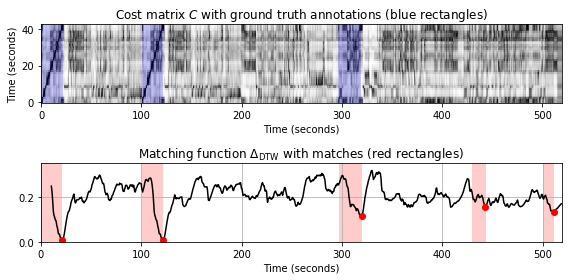

=== Query X: Bernstein (Theme 1); Database Y: Karajan  ===


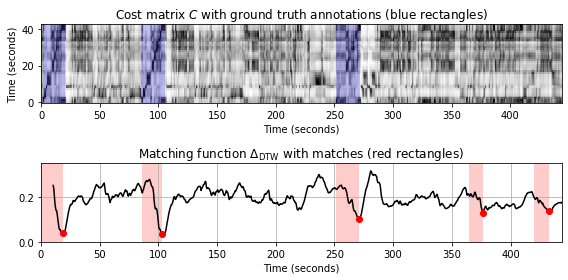

=== Query X: Bernstein (Theme 1); Database Y: Scherbakov (piano version)  ===


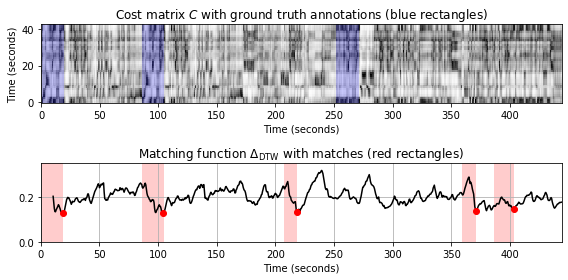

In [2]:
import os
import sys
import numpy as np
import librosa
import matplotlib.pyplot as plt

sys.path.append('..')
import LibFMP.B
import LibFMP.C4
import LibFMP.C7
%matplotlib inline

def compute_CENS_from_file(fn_wav, Fs=22050, N=4410, H=2205, ell=21, d=5):
    """Compute CENS features from file

    Notebook: C7/C7S2_AudioMatching.ipynb

    Args:
        fn_wav: Filename of wav file
        Fs: Feature rate of wav file
        N: Window size for STFT
        H: Hope size for STFT
        ell: Smoothing length
        d: Downsampling factor

    Returns:
        C_CENS: CENS features
        F_CENS: Feature rate of CENS features
        x_duration: Duration (seconds) of wav file
    """
    x, Fs = librosa.load(fn_wav, sr=Fs)
    x_duration = x.shape[0] / Fs
    X_chroma = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
    X_CENS, Fs_CENS = LibFMP.C7.compute_CENS_from_chromagram(X_chroma, Fs=Fs/H, ell=ell, d=d)
    N = X_CENS.shape[1]
    return X_CENS, N, Fs_CENS, x_duration

def compute_matching_function_DTW(X, Y, stepsize=2):
    """Compute CENS features from file

    Notebook: C7/C7S2_AudioMatching.ipynb

    Args:
        X: Query feature sequence (given as K x N matrix)
        Y: Database feature sequence (given as K x M matrix)
        stepsize: Parameter for step size condition (1 or 2)

    Returns:
        Delta: DTW-based matching function
        C: Cost matrix
        D: Accumulated cost matrix
    """
    C = LibFMP.C7.cost_matrix_dot(X, Y)
    if stepsize == 1:
        D = LibFMP.C7.compute_accumulated_cost_matrix_subsequenceDTW(C)
    if stepsize == 2:
        D = LibFMP.C7.compute_accumulated_cost_matrix_subsequenceDTW_21(C)
    N, M = C.shape
    Delta = D[-1, :] / N
    return Delta, C, D

def matches_DTW(pos, D, stepsize=2):
    """Derives matches from positions for DTW-based strategy

    Notebook: C7/C7S2_AudioMatching.ipynb

    Args:
        pos: End positions of matches
        D: Accumulated cost matrix

    Returns:
        matches: Array containing matches (start, end)
    """
    matches = np.zeros((len(pos), 2)).astype(int)
    for k in range(len(pos)):
        t = pos[k]
        matches[k, 1] = t
        if stepsize == 1:
            P = LibFMP.C7.compute_optimal_warping_path_subsequenceDTW(D, m=t)
        if stepsize == 2:
            P = LibFMP.C7.compute_optimal_warping_path_subsequenceDTW_21(D, m=t)
        s = P[0, 1]
        matches[k, 0] = s
    return matches
    
def compute_plot_matching_function_DTW(fn_wav_X, fn_wav_Y, fn_ann, 
                                       ell=21, d=5, stepsize=2, tau=0.2, num=5, ylim=[0,0.35]):
    ann, _ = LibFMP.C4.read_structure_annotation(fn_ann)
    color_ann = {'Theme': [0, 0, 1, 0.1], 'Match': [0, 0, 1, 0.2]}
    X, N, Fs_X, x_duration = compute_CENS_from_file(fn_wav_X, ell=ell, d=d)
    Y, M, Fs_Y, y_duration = compute_CENS_from_file(fn_wav_Y, ell=ell, d=d)
    Delta, C, D = compute_matching_function_DTW(X, Y, stepsize=stepsize)
    pos = LibFMP.C7.mininma_from_matching_function(Delta, rho=2*N//3, tau=tau, num=num)
    matches = matches_DTW(pos, D, stepsize=stepsize)

    fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 
                                              'height_ratios': [1, 1]}, figsize=(8, 4))
    cmap = LibFMP.B.compressed_gray_cmap(alpha=-10, reverse=True)
    LibFMP.B.plot_matrix(C, Fs=Fs_X, ax=[ax[0]], ylabel='Time (seconds)',
                         title='Cost matrix $C$ with ground truth annotations (blue rectangles)', 
                         colorbar=False, cmap=cmap)
    LibFMP.B.plot_segments_overlay(ann, ax=ax[0], alpha=0.2, time_max=y_duration, 
                                   colors = color_ann, print_labels=False)

    title = r'Matching function $\Delta_\mathrm{DTW}$ with matches (red rectangles)'
    LibFMP.B.plot_signal(Delta,  ax=ax[1], Fs=Fs_X, color='k', title=title, ylim=ylim)
    ax[1].grid()
    LibFMP.C7.plot_matches(ax[1], matches, Delta, Fs=Fs_X, s_marker='', t_marker='o')
    plt.tight_layout()  
    plt.show()

data_dir = os.path.join('..', 'data', 'C7')
fn_wav_all = [os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Bernstein.wav'),
              os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Karajan.wav'),
              os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Scherbakov.wav')]
fn_ann_all = [os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Bernstein_Theme.csv'),
              os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Karajan_Theme.csv'),
              os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Scherbakov_Theme.csv')]
names_all = ['Bernstein', 'Karajan', 'Scherbakov (piano version)']       
fn_wav_X = os.path.join(data_dir, 'FMP_C7_Audio_Beethoven_Op067-01_Bernstein_Theme_1.wav')

for f in range(3):
    print('=== Query X: Bernstein (Theme 1); Database Y:', names_all[f],' ===')
    compute_plot_matching_function_DTW(fn_wav_X,  fn_wav_all[f], fn_ann_all[f])

## DTW-Based Audio Matching: Shostakovich Example

As a second example, we consider the second Waltz of Shostakovich's Jazz Suite No. 2. We have already encountered this piece in the context of [tempo and beat tracking](../C6/C6S1_NoveltyComparison.html). This piece is of the form $A_1A_2BA_3A_4$, where the $A$-part consists of $38$ measures and appears four times (parts $A_1$, $A_2$, $A_3$, and $A_4$), each time in a different instrumentation. In part $A_1$ the melody is played by saxophone and wood instruments, then in $A_2$ by strings, in $A_3$ by trombone and brass, and finally in $A_4$ in a tutti version. We consider two different recordings of the Waltz (Chailly, Yablonsky), leading to a total number of eight occurrences of the theme. In the following audio example, we present the main theme of the $A$-part (16 measures) of each of the eight occurrences.

<br clear="all" />

<table style="border:none;text-align:left;">
   <tr>
      <th style="width:8%; border:none;text-align:left;">Performer</th>
      <th style="width:23%; border:none;text-align:left;">A1 (saxophone)</th>
      <th style="width:23%; border:none;text-align:left;">A2 (strings)</th>        
      <th style="width:23%; border:none;text-align:left;">A3 (trombone)</th>      
      <th style="width:23%; border:none;text-align:left;">A4 (tutti)</th>           
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Chailly</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_1.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_2.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_3.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_4.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>         
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Yablonsky</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme_1.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme_2.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme_3.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio style="width: 120px;" src="../data/C7/FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme_4.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>         
   </tr>
</table>

As query $\mathcal{Q}$, we use the $16$-measure theme of $A_1$ in the Chailly interpretation. As database documents, we use the entire Chailly as well as the entire Yablonsky recording, respectively. In the following figures, we use the same matching procedure and parameter settings as in the Beethoven example above.

<!--
ot surprisingly, the quality of the matching results depends on the length of the query: queries of short duration will generally lead to a large number of matches in a close neighborhood of the query. Enlarging the query length
will generally reduce the number of such matches. We illustrate this principle by means of the second Waltz of Shostakovich's Jazz Suite No. 2. This piece is of the form $A_1A_2BA_3A_4$, where the first theme consists of $38$ measures and appears four times (parts $A_1$, $A_2$, $A_3$, and $A_4$), each time in a different instrumentation. In part $A_1$ the melody is played by strings, then in $A_2$ by clarinet and wood instruments, in $A_3$ by trombone and brass, and finally in $A_4$ in a tutti version. The Waltz is contained in our database in two different
interpretations (Chailly, Yablonsky) leading to a total number of $8$ occurrences of the theme.

As query, which we denote by $\mathcal{Q}= \mathrm{Shosta}(n)$, we use the first $n$ measures of the theme in the Chailly interpretation. The following table sows the total number of matches with a $\Delta$-matching cost below $0.2$ as well as the rank position of the $8$ occurrences of the theme in the two interpretations.

<img src="../data/C7/FMP_C7_F-ISMIR05_Schostakovich_Table.png" width="600px" align="middle" alt="FMP_C7_F-ISMIR05_Schostakovich_Table.png">

For example, the query clip $\mathrm{Shosta}(12)$ (duration of $13$ seconds) leads to $590$ matches with a $\Delta$-cost lower than $0.2$. Among these matches the four occurrences $A_1$, $A_2$, $A_3$, and $A_4$
in the Chailly interpretation could be found at position $1$ (the query itself), $2$, $6$ and $10$, respectively. However, the four occurrences in the Yablonsky interpretation can be found at much lower ranks, namely at the positions $119$, $59$, $103$, and $138$. Enlarging the query to $20$ measures ($22$ seconds) leads to a much smaller number of $23$ matches with a $\Delta$-distance lower than $0.2$. Only the trombone theme in the Yablonsky version ($36^\mathrm{th}$ match with $\Delta$-distance of $0.207$) was not among the first $23$ matches. Finally, querying $\mathrm{Shosta}(27)$ leads to $8$ matches with a $\Delta$-distance lower than $0.2$, exactly corresponding to the eight "correct" occurrences. Among these matches, the two trombone versions have the largest $\Delta$-distances. This is due to the fact that the spectra of low-pitched instruments such as the trombone generally exhibit phenomena such as oscillations and smearing effects resulting in degraded CENS features.

<img src="../data/C7/FMP_C7_F-ISMIR05_Schostakovich.png" width="500px" align="middle" alt="FMP_C7_F-ISMIR05_Schostakovich.png">


<img src="../data/C7/FMP_C7_F-ISMIR05_Schostakovich-22.png" width="500px" align="middle" alt="FMP_C7_F-ISMIR05_Schostakovich-22">
-->

=== Query X: Chailly (A1, 16 measures); Database Y: Chailly  ===


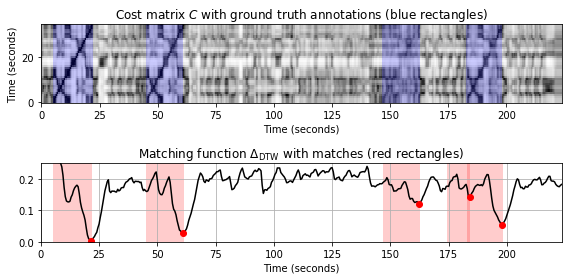

=== Query X: Chailly (A1, 16 measures); Database Y: Yablonsky  ===


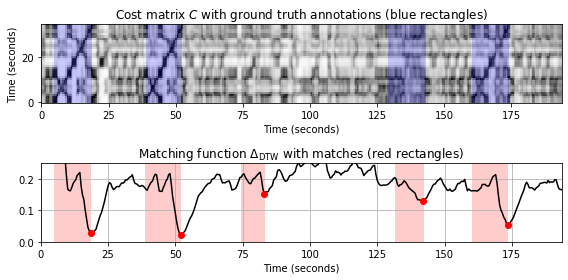

In [3]:
data_dir = os.path.join('..', 'data', 'C7')
fn_wav_all = [os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly.wav'),
              os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky.wav')]
fn_ann_all = [os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme.csv'),
              os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme.csv')]
names_all = ['Chailly', 'Yablonsky']                               
fn_wav_X = os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_1.wav')

for f in range(2):
    print('=== Query X: Chailly (A1, 16 measures); Database Y:', names_all[f],' ===')
    compute_plot_matching_function_DTW(fn_wav_X,  fn_wav_all[f], fn_ann_all[f], ylim=[0, 0.25])

Looking at the results, we want to make several comments:

* All four occurrences in both of the versions appear as the top four matches, respectively. 
* Even though the Yablonsky version is faster than the Chailly version, these tempo variations are successfully handled by the DTW-based matching strategy. 
* In both versions, the occurrence in $A_3$ (trombone version) has the largest $\Delta_\mathrm{DTW}$-distance. This is due to the fact that the spectra of low-pitched instruments (e.g., the trombone) generally exhibit phenomena such as oscillations and smearing, which in turn results in "noisy" CENS- features. 

To indicate the limitations of our matching procedure, we next use the first $16$ measures of $A_3$ (trombone version) as the query $\mathcal{Q}$ and repeat the experiment. While the $A_3$-theme in the Yablonsky-version could be identified correctly, it now becomes much harder to identify the remaining occurrences. As a result, the number of false-positive and false-negative matches increases.

=== Query X: Chailly (A3, 16 measures); Database Y: Chailly  ===


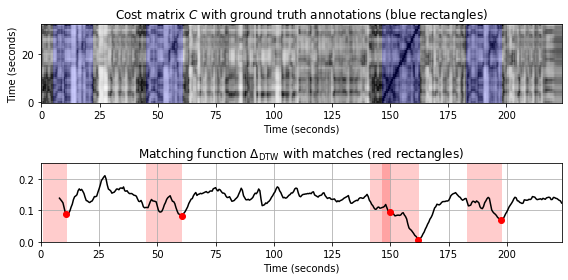

=== Query X: Chailly (A3, 16 measures); Database Y: Yablonsky  ===


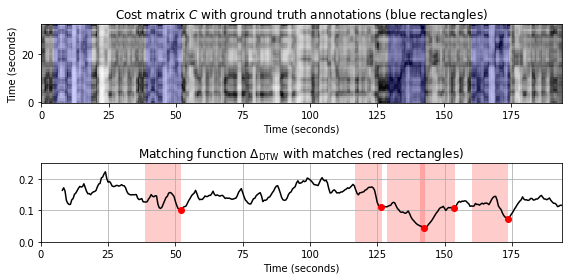

In [4]:
fn_wav_X = os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_3.wav')

for f in range(2):
    print('=== Query X: Chailly (A3, 16 measures); Database Y:',names_all[f],' ===')
    compute_plot_matching_function_DTW(fn_wav_X,  fn_wav_all[f], fn_ann_all[f], ylim=[0,0.25])

The quality of the matching results also crucially depends on the length of the query: queries of short duration ([having low specificity](../C7/C7_ContentBasedAudioRetrieval.html)) will generally lead to a large number of spurious matches, while enlarging the query length ([thus increasing its specificity](../C7/C7_ContentBasedAudioRetrieval.html)) will generally reduce the number of such matches. We illustrate this by considering $32$ measures (instead of $16$ measures) of $A_3$ of the Chailly recording as the query $\mathcal{Q}$.

=== Query X: Chailly (A3, 32 measures); Database Y: Chailly  ===


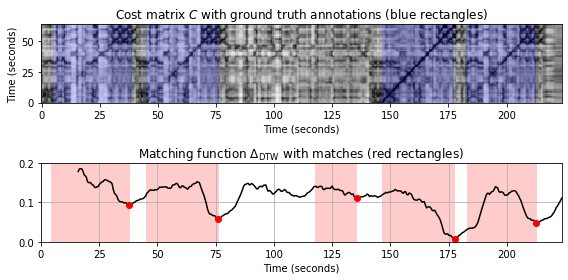

=== Query X: Chailly (A3, 32 measures); Database Y: Yablonsky  ===


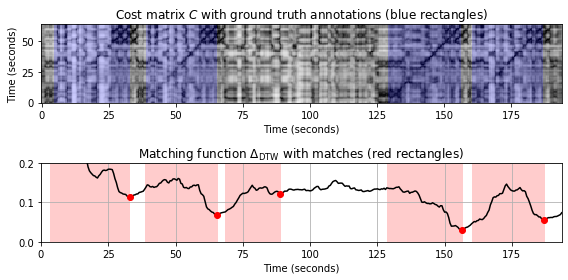

In [5]:
fn_wav_X = os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_3_32.wav')
fn_ann_all = [os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Chailly_Theme_32.csv'),
              os.path.join(data_dir, 'FMP_C7_Audio_Shostakovich_Waltz-02_Yablonsky_Theme_32.csv')]


for f in range(2):
    print('=== Query X: Chailly (A3, 32 measures); Database Y:',names_all[f],' ===')
    compute_plot_matching_function_DTW(fn_wav_X,  fn_wav_all[f], fn_ann_all[f], ylim=[0, 0.2])

## Transposition-Invariant Matching Function

In retrieval applications, one may want to identify audio excerpts even if they are played in a different musical key. We now discuss how one can handle possible transpositions between the query and matching database sections. As an example, let us consider the song "In the year 2525" by Zager and Evans, which we already encountered in the [FMP notebook on transposition-invariant SSMs](../C4/C4S2_SSM-TranspositionInvariance.html). The song has the overall musical structure $IV_1V_2V_3V_4V_5V_6V_7BV_8O$. It starts with a slow intro, which is represented by the $I$-part. The verse of the song, which is represented by the $V$-part, occurs eight times. While the first four verse sections are in the same musical key, $V_5$ and $V_6$ are transposed by one semitone upwards, and $V_7$ and $V_8$ are transposed by two semitones upwards.

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:center;">I</th>
      <th style="border:none;text-align:center;">V1</th>
      <th style="border:none;text-align:center;">V2</th>
      <th style="border:none;text-align:center;">V3</th>
      <th style="border:none;text-align:center;">V4</th>
      <th style="border:none;text-align:center;">V5</th>  
      <th style="border:none;text-align:center;">V6</th>
      <th style="border:none;text-align:center;">V7</th>
      <th style="border:none;text-align:center;">B</th>
      <th style="border:none;text-align:center;">V8+O</th>         
   </tr>
   <tr>
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-I.mp3" type="audio/mpeg" controls="controls"></audio></td>   
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V1.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V2.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V3.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V4T.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V5.mp3" type="audio/mpeg" controls="controls"></audio></td>   
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V6T.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V7.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-B.mp3" type="audio/mpeg" controls="controls"></audio></td>  
      <td style="border:none;text-align:center;"><audio style="width: 50px;" src="../data/C7/FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V8O.mp3" type="audio/mpeg" controls="controls"></audio></td>         
   </tr>   
</table>

<img src="../data/C4/FMP_C4_F13_ZagerEvans_InTheYear2525.png" width="650px" align="middle" alt="FMP_C4_F02">

As discussed the [FMP notebook on transposition and tuning](../C3/C3S1_TranspositionTuning.html) (see also Section 3.1.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>), one can simulate transpositions by cyclically shifting the chroma features along the $12$-dimensional chroma axis. To this end, we introduced the **cyclic shift operator** $\rho:\mathbb{R}^{12} \to \mathbb{R}^{12}$ given by 

\begin{equation}
   \rho(x):=(x(11),x(0),x(1),\ldots,x(10))^\top
\end{equation}

for $x=(x(0),x(1),\ldots,x(10),x(11))^\top\in\mathbb{R}^{12}$. Applying $\rho$ successively, one obtains the twelve different cyclic shifts $\rho^i$ for $i\in[0:11]$. Furthermore, let 

\begin{equation}
   \rho^i(X)=(\rho^i(x_1),\rho^i(x_2),\ldots,\rho^i(x_N))
\end{equation}

be the shifted versions of the query $X$ for $i\in[0:11]$. Then, the idea is to use each of the twelve sequences $\rho^i(X)$ as a separate query to retrieve matches from the database. To this end, one first computes a separate matching function, say $\Delta^{i}$, for each $\rho^i(X)$ and $Y$.  The **transposition-invariant matching function** $\Delta^\mathrm{TI}$ is then obtained by setting 

\begin{equation}
 \Delta^\mathrm{TI}(m):=  \min_{i\in [0:11]} \Delta^{i}(m)
\end{equation}

for $m\in[0:M-1]$. We now illustrate this procedure by means of the song "In the year 2525" by Zager and Evans using the first verse section $V_1$ as the query $X$ and the entire song as our database sequence $Y$. In the following, we use the same implementation for the DTW-based matching approach as before. In particular, we have $\Delta^{0}=\Delta_\mathrm{DTW}$. In our visualization, we show the matching functions $\Delta^{i}$ for $i=0,1,2,3$ as well as the transposition-invariant matching function $\Delta^\mathrm{TI}$. The first eight local minima $\Delta^\mathrm{TI}$ correctly indicate the end positions of the eight verse sections.

<!--<img src="../data/C7/FMP_C7_F16_text.png" width="400px" align="middle" alt="FMP_C7_F16_text.png">-->

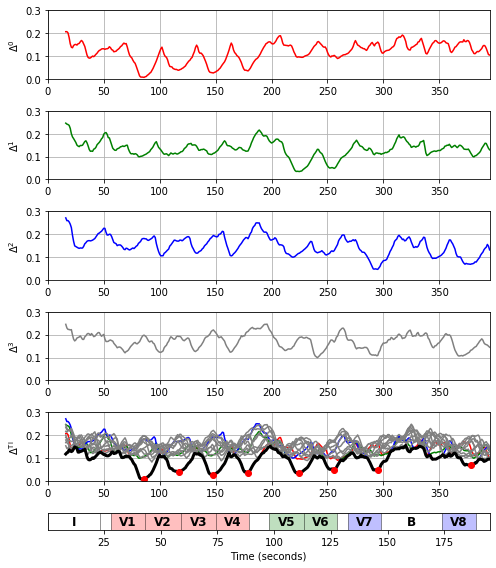

In [6]:
def compute_matching_function_DTW_TI(X, Y, cyc=np.arange(12), stepsize=2):
    """Compute transposition-invariant matching function

    Notebook: C7/C7S2_AudioMatching.ipynb

    Args:
        X: Query feature sequence (given as K x N matrix)
        Y: Database feature sequence (given as K x M matrix)
        cyc: Set of cyclic shift indices to be considered
        stepsize: Parameter for step size condition (1 or 2)

    Returns:
        Delta_TI: Transposition-invariant matching function
        Delta_ind: Cost-minimizing indices
        Delta_cyc: Array containing all matching functions
    """
    M = Y.shape[1]
    num_cyc = len(cyc)
    Delta_cyc = np.zeros((num_cyc, M))
    for k in range(num_cyc):
        X_cyc = np.roll(X, k, axis=0)
        Delta_cyc[k, :], C, D = compute_matching_function_DTW(X_cyc, Y, stepsize=stepsize)
    Delta_TI = np.min(Delta_cyc, axis=0)
    Delta_ind = np.argmin(Delta_cyc, axis=0)
    return Delta_TI, Delta_ind, Delta_cyc
    
data_dir = os.path.join('..', 'data', 'C7')
fn_wav = os.path.join(data_dir, 'FMP_C7_Audio_ZagerEvans_InTheYear2525.wav')
fn_ann = os.path.join(data_dir, 'FMP_C7_Audio_ZagerEvans_InTheYear2525.csv')
fn_wav_X = os.path.join(data_dir, 'FMP_C7_Audio_ZagerEvans_InTheYear2525_Part-V1.wav')

ann, _ = LibFMP.C4.read_structure_annotation(fn_ann)
ann_color = {'I': 'white', 'V1': 'red', 'V2': 'red', 'V3': 'red', 'V4': 'red', 'V5': 'green', 'V6': 'green',
             'V7': 'blue', 'B': 'white', 'V8': 'blue', 'O': 'gray', '': 'white'}

X, N, Fs_X, x_duration = compute_CENS_from_file(fn_wav_X, ell=21, d=5)
Y, M, Fs_Y, y_duration = compute_CENS_from_file(fn_wav, ell=21, d=5)

Delta_TI, Delta_ind, Delta_cyc = compute_matching_function_DTW_TI(X, Y)
pos = LibFMP.C7.mininma_from_matching_function(Delta_TI, rho=2*N//3, tau=0.1, num=8)

fig, ax = plt.subplots(6, 1, figsize=(7, 8), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 0.25]}) 

color_set = ['red', 'green', 'blue', 'gray', 'gray', 'gray', 'gray' ,'gray' ,'gray' ,'gray' ,'gray' ,'gray']
for k in range(4):
    LibFMP.B.plot_signal(Delta_cyc[k,:], ax=ax[k], xlabel='', ylabel = r'$\Delta^{%d}$' % k,
                         color=color_set[k], ylim=[0, 0.3])
    ax[k].grid()

for k in range(12):
    LibFMP.B.plot_signal(Delta_cyc[k,:], ax=ax[4], color=color_set[k], ylim=[0, 0.3])
    
LibFMP.B.plot_signal(Delta_TI, ax=ax[4], color='k', linewidth='3', ylim=[0, 0.3],
                     ylabel = r'$\Delta^{\mathrm{TI}}$', xlabel='')
ax[4].grid()    
LibFMP.B.plot_segments(ann, ax=ax[5], nontime_axis=False, adjust_nontime_axislim=False,
                       colors=ann_color, alpha=0.25)
ax[4].plot(pos, Delta_TI[pos], 'ro')
ax[5].set_xlabel('Time (seconds)')
plt.tight_layout()

## Further Notes

As noted before, there are many design choices when implementing an audio matching procedure. The requirements of the system also very much depend on the musical application and genre to be considered in the matching. 

* In this notebook, using [chroma-based features](../C7/C7S2_CENS.html), we presented a system that is suitable for identifying harmonically similar sections of Western music. This is a reasonable choice when considering the case of different performances of Western classical music.

* We showed that the quality of the matching results depends on the length of the query. For many Western classical music pieces, it turns out that a query length of at least $20$ seconds of duration yields reasonable results. In our implementation, using a feature resolution of $2~\mathrm{Hz}$, results in a query feature length of $N=40$.

* Subsequence DTW introduces a lot of flexibility to compensate for temporal deformations between query and database section. When using the step size condition $\Sigma=\{(1, 0), (0, 1), (1, 1)\}$, there is the tendency of overcompensation, which may result in a large number of false-positive matches. In practice, the set $\Sigma=\{(2, 1), (1, 2), (1, 1)\}$ turns out to constitute a good compromise between temporal flexibility and robustness. 

* In original paper on [Audio Matching via Chroma-Based Statistical Features](https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2005_MuellerKurthClausen_AudioMatching_ISMIR.pdf)
a [multiple-query diagonal matching](../C7/C7S2_DiagonalMatching.html) is used instead of subsequence DTW. Even though being less flexible than subsequence DTW, diagonal matching in combination with the strong local smoothing of [CENS features](../C7/C7S2_CENS.html) turns out to be a good alternative&mdash;in particular if the query sequence length is not too long. 

* Using diagonal matching with multiple queries also may have advantages when accelerating the matching process using indexing techniques. This strategy was applied by Kurth and Müller ([Efficient Index-Based Audio Matching](https://ieeexplore.ieee.org/document/4432645/)) as well as by Grosche and Müller ([Toward Characteristic Audio Shingles for Efficient Cross-Version Music Retrieval](https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_GroscheMueller_RetrievalShingles_ICASSP.pdf)).

* The concept of transposition-invariant matching functions is based on the same idea as the one used in the [FMP notebook on transposition-invariant SSMs](../C4/C4S2_SSM-TranspositionInvariance.html). Conceptually, it is also related to using [multiple queries in diagonal matching](../C7/C7S2_DiagonalMatching.html) to simulating different tempi.


<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>